In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\91704\.conda\envs\pycaret\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\91704\.conda\envs\pycaret\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\91704\.conda\envs\pycaret\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [4]:
df = pd.read_csv('clinvar_conflicting.csv')
df.head()

C:\Users\91704\AppData\Local\Temp\ipykernel_28552\1409591936.py:1: DtypeWarning: Columns (0,38,40) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('clinvar_conflicting.csv')


CHROM      POS REF ALT  AF_ESP  AF_EXAC  AF_TGP  \
0     1  1168180   G   C  0.0771  0.10020  0.1066   
1     1  1470752   G   A  0.0000  0.00000  0.0000   
2     1  1737942   A   G  0.0000  0.00001  0.0000   
3     1  2160305   G   A  0.0000  0.00000  0.0000   
4     1  2160305   G   T  0.0000  0.00000  0.0000   

                                            CLNDISDB CLNDISDBINCL  \
0                                    MedGen:CN169374          NaN   
1  MedGen:C1843891,OMIM:607454,Orphanet:ORPHA9877...          NaN   
2  Human_Phenotype_Ontology:HP:0000486,MedGen:C00...          NaN   
3  MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002...          NaN   
4     MedGen:C1321551,OMIM:182212,SNOMED_CT:83092002          NaN   

                                               CLNDN  ...  \
0                                      not_specified  ...   
1             Spinocerebellar_ataxia_21|not_provided  ...   
2  Strabismus|Nystagmus|Hypothyroidism|Intellectu...  ...   
3          Shprintzen-Goldberg_syndrome|not_provided  ...   
4                       Shprintzen-Goldberg_syndrome  ...   

                         SIFT           PolyPhen MOTIF_NAME MOTIF_POS  \
0                   tolerated             benign        NaN       NaN   
1  deleterious_low_confidence             benign        NaN       NaN   
2                 deleterious  probably_damaging        NaN       NaN   
3                         NaN                NaN        NaN       NaN   
4                         NaN                NaN        NaN       NaN   

  HIGH_INF_POS MOTIF_SCORE_CHANGE  LoFtool  CADD_PHRED  CADD_RAW BLOSUM62  
0          NaN                NaN      NaN       1.053 -0.208682      2.0  
1          NaN                NaN      NaN      31.000  6.517838     -3.0  
2          NaN                NaN      NaN      28.100  6.061752     -1.0  
3          NaN                NaN      NaN      22.500  3.114491      NaN  
4          NaN                NaN      NaN      24.700  4.766224     -3.0  

[5 rows x 46 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65188 entries, 0 to 65187
Data columns (total 46 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CHROM               65188 non-null  object 
 1   POS                 65188 non-null  int64  
 2   REF                 65188 non-null  object 
 3   ALT                 65188 non-null  object 
 4   AF_ESP              65188 non-null  float64
 5   AF_EXAC             65188 non-null  float64
 6   AF_TGP              65188 non-null  float64
 7   CLNDISDB            65188 non-null  object 
 8   CLNDISDBINCL        167 non-null    object 
 9   CLNDN               65188 non-null  object 
 10  CLNDNINCL           167 non-null    object 
 11  CLNHGVS             65188 non-null  object 
 12  CLNSIGINCL          167 non-null    object 
 13  CLNVC               65188 non-null  object 
 14  CLNVI               27659 non-null  object 
 15  MC                  64342 non-null  object 
 16  ORIG

In [6]:
df.describe()

POS        AF_ESP       AF_EXAC        AF_TGP        ORIGIN  \
count  6.518800e+04  65188.000000  65188.000000  65188.000000  65188.000000   
mean   7.757594e+07      0.014511      0.014492      0.015263      1.342486   
std    5.974051e+07      0.057795      0.059542      0.059527      5.688772   
min    9.610000e+02      0.000000      0.000000      0.000000      0.000000   
25%    3.254179e+07      0.000000      0.000000      0.000000      1.000000   
50%    5.797021e+07      0.000000      0.000040      0.000000      1.000000   
75%    1.127454e+08      0.001200      0.001230      0.001600      1.000000   
max    2.476080e+08      0.499000      0.499890      0.499800    513.000000   

              SSR         CLASS     DISTANCE        STRAND  MOTIF_POS  \
count  130.000000  65188.000000   108.000000  65174.000000        2.0   
mean     2.269231      0.252102   825.731481     -0.006659        1.0   
std      4.190777      0.434223  1069.363315      0.999985        0.0   
min      1.000000      0.000000     1.000000     -1.000000        1.0   
25%      1.000000      0.000000    55.500000     -1.000000        1.0   
50%      1.000000      0.000000   469.000000     -1.000000        1.0   
75%      1.000000      1.000000  1415.000000      1.000000        1.0   
max     16.000000      1.000000  4759.000000      1.000000        1.0   

       MOTIF_SCORE_CHANGE       LoFtool    CADD_PHRED      CADD_RAW  \
count            2.000000  60975.000000  64096.000000  64096.000000   
mean            -0.080000      0.345058     15.685616      2.554131   
std              0.024042      0.361238     10.836350      2.961553   
min             -0.097000      0.000069      0.001000     -5.477391   
25%             -0.088500      0.024300      7.141000      0.462951   
50%             -0.080000      0.157000     14.090000      1.642948   
75%             -0.071500      0.710000     24.100000      4.381392   
max             -0.063000      1.000000     99.000000     46.556261   

           BLOSUM62  
count  25593.000000  
mean      -0.402258  
std        1.872684  
min       -3.000000  
25%       -2.000000  
50%       -1.000000  
75%        1.000000  
max        3.000000

In [7]:
df.isnull().sum()

CHROM                     0
POS                       0
REF                       0
ALT                       0
AF_ESP                    0
AF_EXAC                   0
AF_TGP                    0
CLNDISDB                  0
CLNDISDBINCL          65021
CLNDN                     0
CLNDNINCL             65021
CLNHGVS                   0
CLNSIGINCL            65021
CLNVC                     0
CLNVI                 37529
MC                      846
ORIGIN                    0
SSR                   65058
CLASS                     0
Allele                    0
Consequence               0
IMPACT                    0
SYMBOL                   16
Feature_type             14
Feature                  14
BIOTYPE                  16
EXON                   8893
INTRON                56385
cDNA_position          8884
CDS_position           9955
Protein_position       9955
Amino_acids           10004
Codons                10004
DISTANCE              65080
STRAND                   14
BAM_EDIT            

In [8]:
df2=df[['POS','AF_ESP','AF_EXAC','AF_TGP','ORIGIN','LoFtool','CADD_PHRED','CADD_RAW','CLASS']]

In [9]:
LoFtool_Mean=df2['LoFtool'].mean()
df2['LoFtool'].fillna(LoFtool_Mean,inplace=True)

CADD_PHRED_Mean=df2['CADD_PHRED'].mean()
df2['CADD_PHRED'].fillna(CADD_PHRED_Mean,inplace=True)

CADD_RAW_Mean=df2['CADD_RAW'].mean()
df2['CADD_RAW'].fillna(CADD_RAW_Mean,inplace=True)

#df2['STRAND'].fillna(-1.0,inplace=True)


C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2041681518.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['LoFtool'].fillna(LoFtool_Mean,inplace=True)
C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2041681518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['CADD_PHRED'].fillna(CADD_PHRED_Mean,inplace=True)
C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2041681518.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

In [10]:
df2.dropna(inplace=True)

C:\Users\91704\AppData\Local\Temp\ipykernel_28552\1761232742.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


In [11]:
df2.isnull().sum()

POS           0
AF_ESP        0
AF_EXAC       0
AF_TGP        0
ORIGIN        0
LoFtool       0
CADD_PHRED    0
CADD_RAW      0
CLASS         0
dtype: int64

In [12]:
unique_v=[]
for i in df2.columns:
    a =len(df2[i].unique())
    unique_v.append([i,a])
unique_v    

[['POS', 63115],
 ['AF_ESP', 2842],
 ['AF_EXAC', 6667],
 ['AF_TGP', 2087],
 ['ORIGIN', 31],
 ['LoFtool', 1196],
 ['CADD_PHRED', 9325],
 ['CADD_RAW', 63804],
 ['CLASS', 2]]

In [13]:
count = [df2.value_counts(i) for i in df2]
count

[POS
 89876827     11
 179578108     9
 73613031      8
 92944314      7
 103629803     7
              ..
 41244300      1
 41244321      1
 41244327      1
 41244328      1
 247607973     1
 Length: 63115, dtype: int64,
 AF_ESP
 0.0000    35781
 0.0001     3924
 0.0002     3199
 0.0003     1110
 0.0005      994
           ...  
 0.2437        1
 0.2430        1
 0.2424        1
 0.2422        1
 0.4990        1
 Length: 2842, dtype: int64,
 AF_EXAC
 0.00000    24047
 0.00001     3263
 0.00003     2321
 0.00002     2037
 0.00004     1013
            ...  
 0.06959        1
 0.06946        1
 0.06942        1
 0.06937        1
 0.49989        1
 Length: 6667, dtype: int64,
 AF_TGP
 0.0000    37972
 0.0002     3786
 0.0004     2073
 0.0006     1352
 0.0008     1059
           ...  
 0.2672        1
 0.2673        1
 0.2678        1
 0.2680        1
 0.4998        1
 Length: 2087, dtype: int64,
 ORIGIN
 1      63940
 33       330
 3        270
 5        200
 17       189
 9        144
 2

In [14]:
df3=df[['CLASS','STRAND','CHROM','IMPACT','Feature_type','BIOTYPE','SIFT','PolyPhen']]

In [15]:
STRAND_Mode=df3['STRAND'].value_counts()
STRAND_Mode

-1.0    32804
 1.0    32370
Name: STRAND, dtype: int64

In [16]:
df3['Feature_type'].fillna('Transcript',inplace=True)

df3['BIOTYPE'].fillna('protein_coding',inplace=True)


df3['PolyPhen'].fillna('benign',inplace=True)

df3['SIFT'].fillna('deleterious',inplace=True)

df3['STRAND'].fillna(-1.0,inplace=True)



C:\Users\91704\AppData\Local\Temp\ipykernel_28552\3203435922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Feature_type'].fillna('Transcript',inplace=True)
C:\Users\91704\AppData\Local\Temp\ipykernel_28552\3203435922.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BIOTYPE'].fillna('protein_coding',inplace=True)
C:\Users\91704\AppData\Local\Temp\ipykernel_28552\3203435922.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-

In [17]:
df3.isnull().sum()

CLASS           0
STRAND          0
CHROM           0
IMPACT          0
Feature_type    0
BIOTYPE         0
SIFT            0
PolyPhen        0
dtype: int64

In [18]:
df3.dropna(inplace=True)

C:\Users\91704\AppData\Local\Temp\ipykernel_28552\1665326329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.dropna(inplace=True)


In [19]:
df3.isnull().sum()

CLASS           0
STRAND          0
CHROM           0
IMPACT          0
Feature_type    0
BIOTYPE         0
SIFT            0
PolyPhen        0
dtype: int64

In [20]:
df3['STRAND'].unique()

array([ 1., -1.])

In [21]:
df3['CLASS'].unique()

array([0, 1], dtype=int64)

In [22]:
unique=[]
for i in df3.columns:
    a =len(df3[i].unique())
    unique.append([i,a])
unique    

[['CLASS', 2],
 ['STRAND', 2],
 ['CHROM', 38],
 ['IMPACT', 4],
 ['Feature_type', 2],
 ['BIOTYPE', 2],
 ['SIFT', 4],
 ['PolyPhen', 4]]

In [23]:
count = [df3.value_counts(i) for i in df3]
count

[CLASS
 0    48754
 1    16434
 dtype: int64,
 STRAND
 -1.0    32818
  1.0    32370
 dtype: int64,
 CHROM
 2     8166
 17    4918
 11    4719
 1     4454
 5     3643
 16    3586
 19    3513
 7     2867
 9     2744
 13    2515
 12    2447
 10    2341
 6     2159
 X     1926
 8     1852
 14    1755
 3     1579
 15    1557
 4     1206
 22    1043
 3      950
 18     785
 21     724
 20     682
 2      479
 17     476
 19     398
 16     341
 12     303
 14     219
 15     168
 13     131
 11     127
 21     119
 18     111
 22      92
 20      77
 MT      16
 dtype: int64,
 IMPACT
 MODERATE    33212
 LOW         21642
 MODIFIER     5582
 HIGH         4752
 dtype: int64,
 Feature_type
 Transcript      65186
 MotifFeature        2
 dtype: int64,
 BIOTYPE
 protein_coding    65174
 misc_RNA             14
 dtype: int64,
 SIFT
 deleterious                   51852
 tolerated                     11484
 tolerated_low_confidence       1077
 deleterious_low_confidence      775
 dtype: int64,
 PolyP

# Heatmap

<AxesSubplot:>

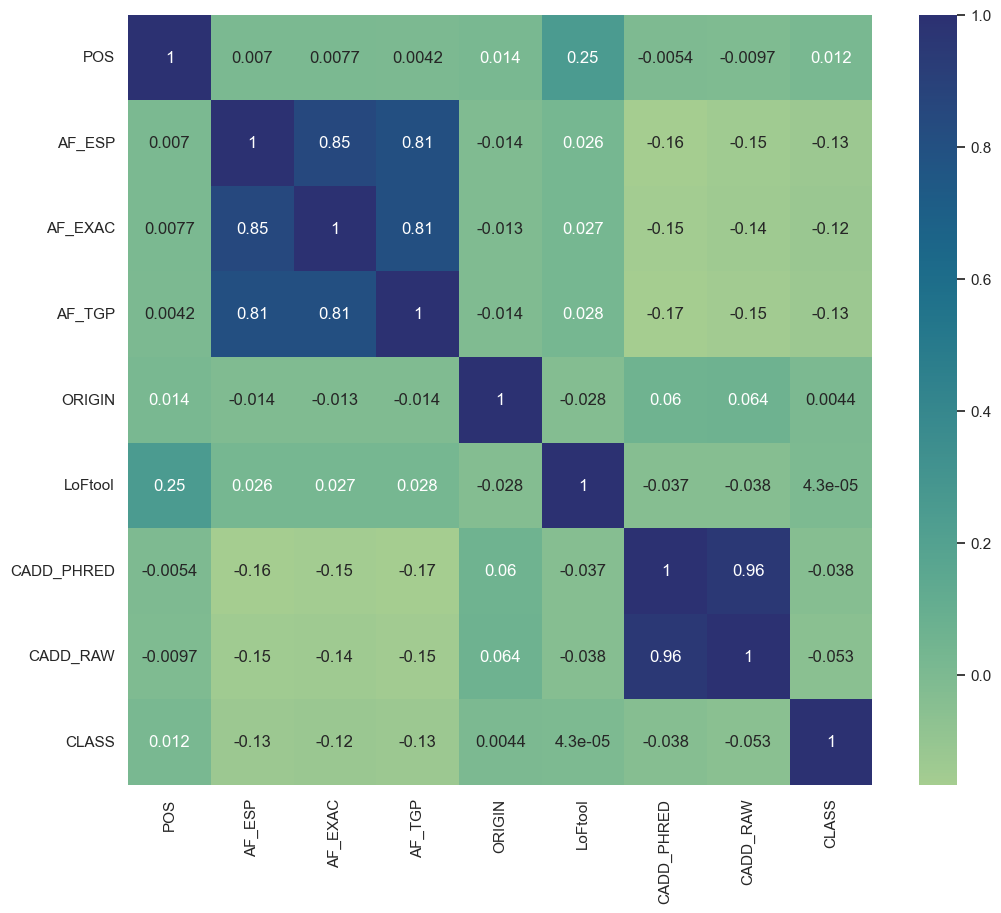

In [24]:
plt.figure(figsize = (12, 10))
sns.set_theme(style = 'dark')
sns.heatmap(df2.corr(),annot=True,cmap="crest")


# Independe numerical variable against Class denpende variable


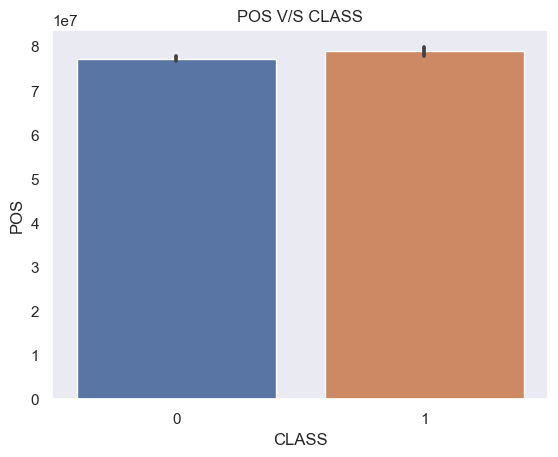

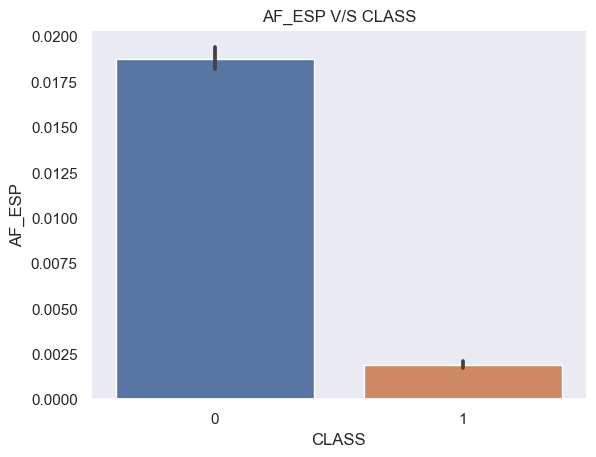

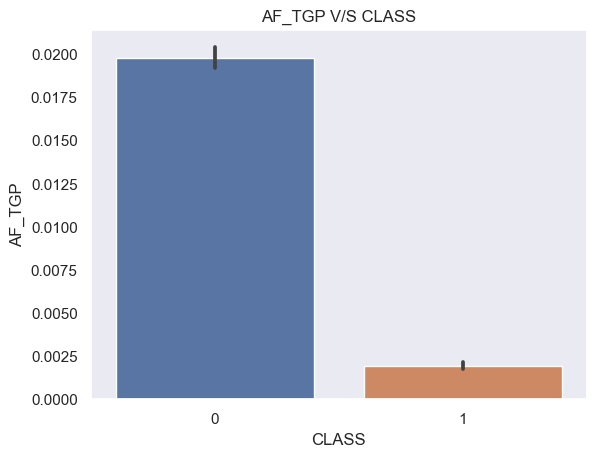

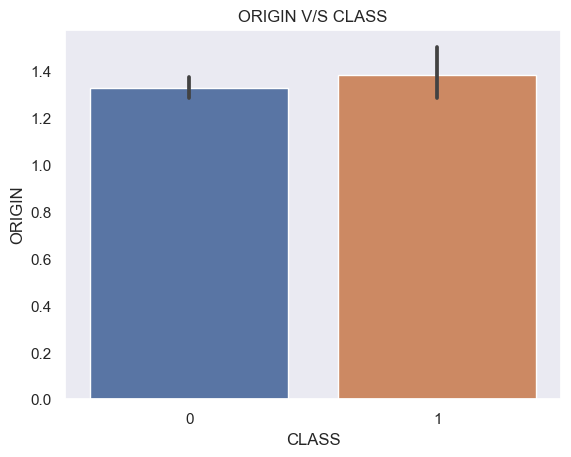

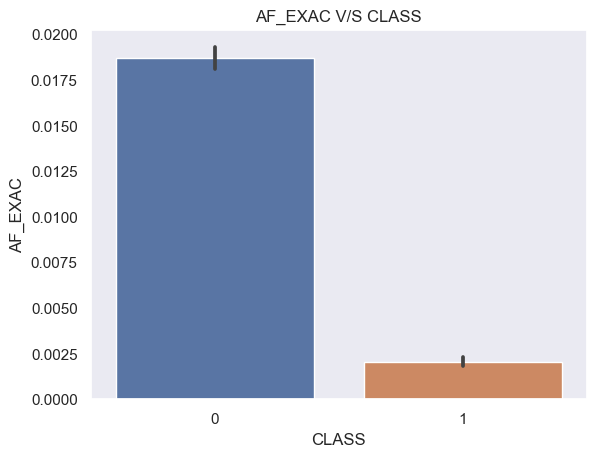

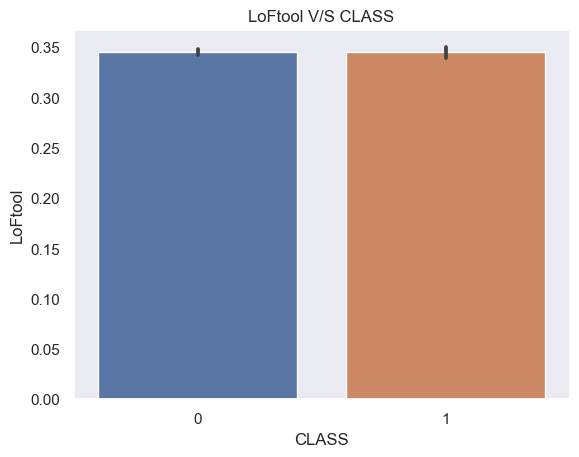

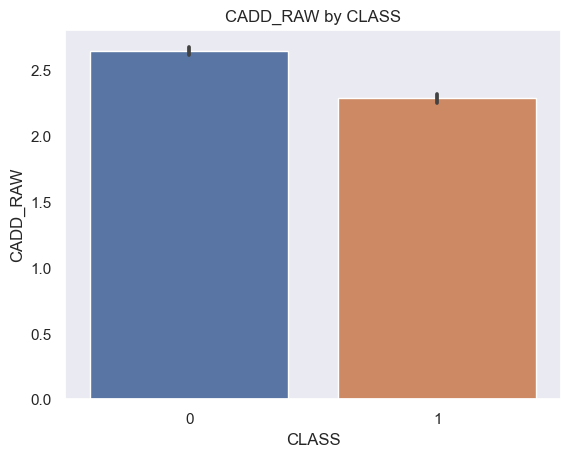

In [25]:
sns.barplot(x ='CLASS',y ='POS',data =df2)
plt.title('POS V/S CLASS')
plt.show()

sns.barplot(x = 'CLASS',y ='AF_ESP', data =df2 )
plt.title('AF_ESP V/S CLASS')
plt.show()

sns.barplot(x ='CLASS',y ='AF_TGP', data =df2)
plt.title('AF_TGP V/S CLASS')
plt.show()

sns.barplot(x ='CLASS',y = 'ORIGIN' , data =df2 )
plt.title('ORIGIN V/S CLASS')
plt.show()


sns.barplot(x ='CLASS',y ='AF_EXAC', data =df2)
plt.title('AF_EXAC V/S CLASS')
plt.show()

sns.barplot(x ='CLASS',y ='LoFtool', data =df2 )
plt.title('LoFtool V/S CLASS')
plt.show()

sns.barplot(x ='CLASS',y ='CADD_RAW', data =df2 )
plt.title('CADD_RAW by CLASS')            
plt.show()

# Categolary Variable against Class Variable

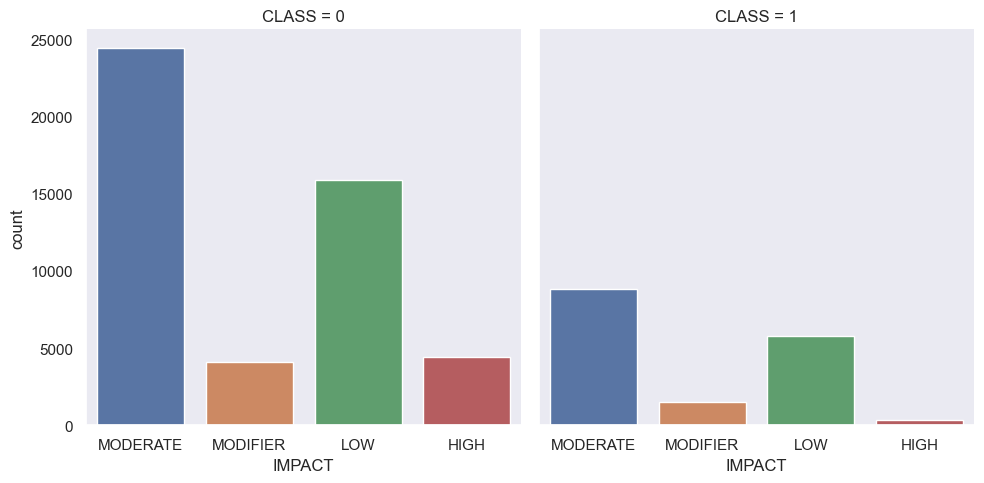

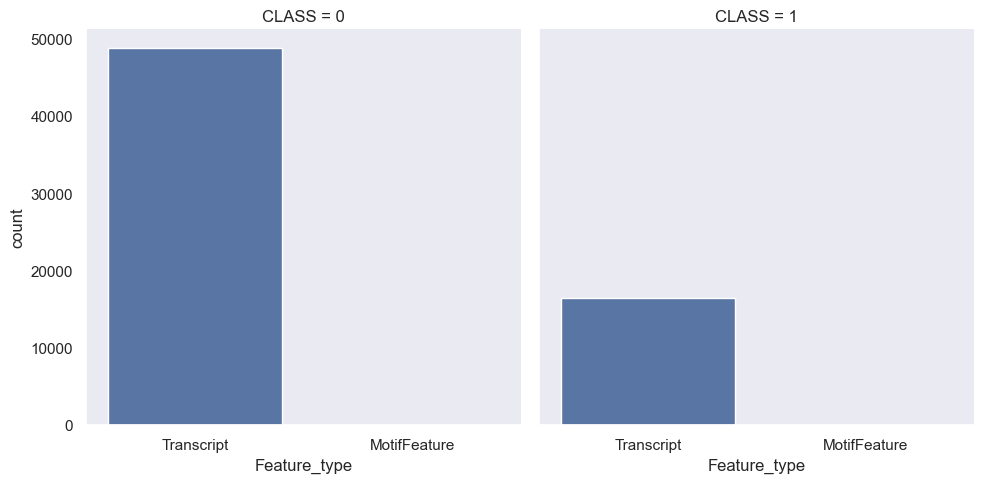

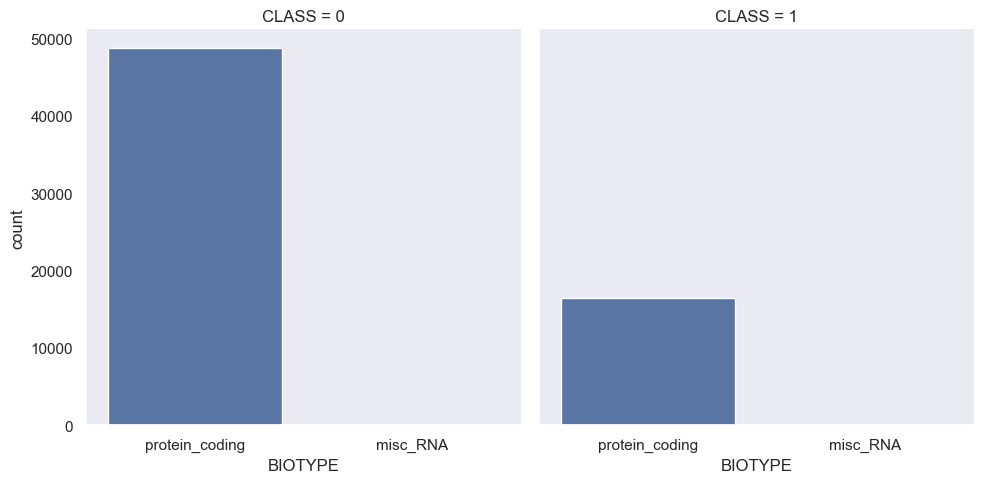

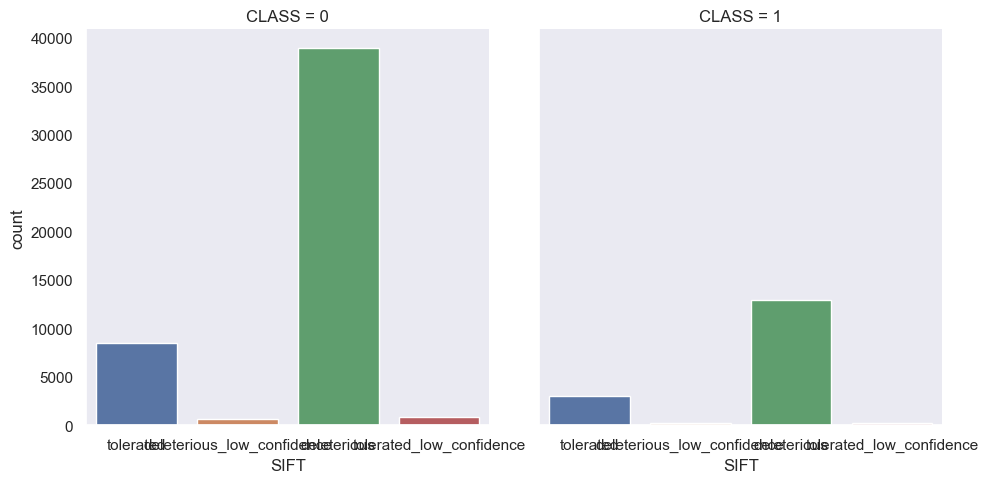

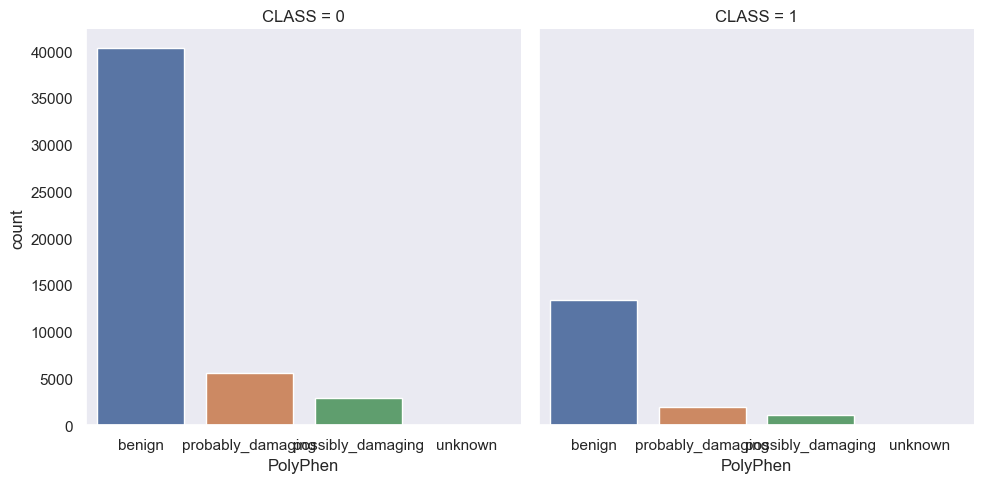

<Figure size 1000x1000 with 0 Axes>

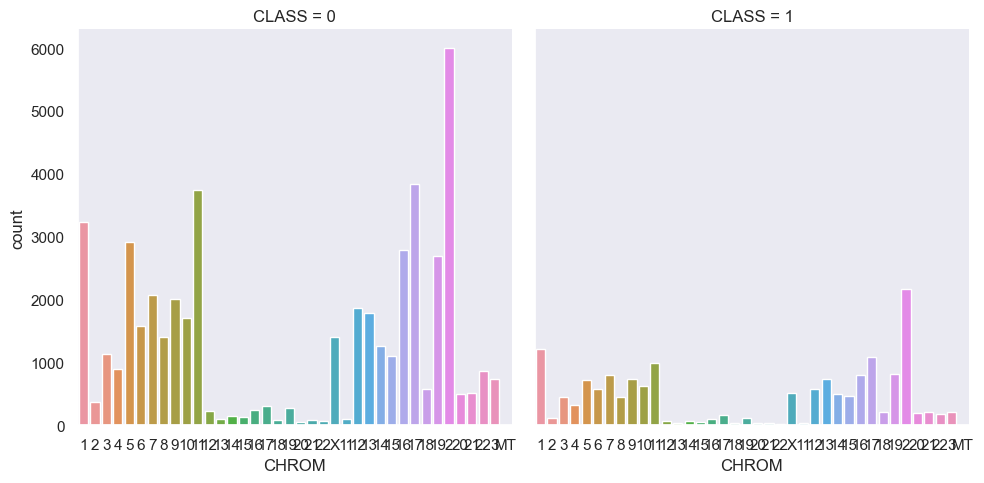

In [26]:
sns.catplot(x = 'IMPACT', col = 'CLASS', kind= 'count', data=df3)

sns.catplot(x = 'Feature_type', col = 'CLASS', kind= 'count', data=df3)

sns.catplot(x = 'BIOTYPE', col = 'CLASS', kind= 'count', data=df3)

sns.catplot(x = 'SIFT', col = 'CLASS', kind= 'count', data=df3)

sns.catplot(x = 'PolyPhen', col = 'CLASS', kind= 'count', data=df3)


plt.figure(figsize=(10,10))
sns.catplot(x = 'CHROM', col = 'CLASS', kind= 'count', data=df3)
plt.show()




# Pairplot 

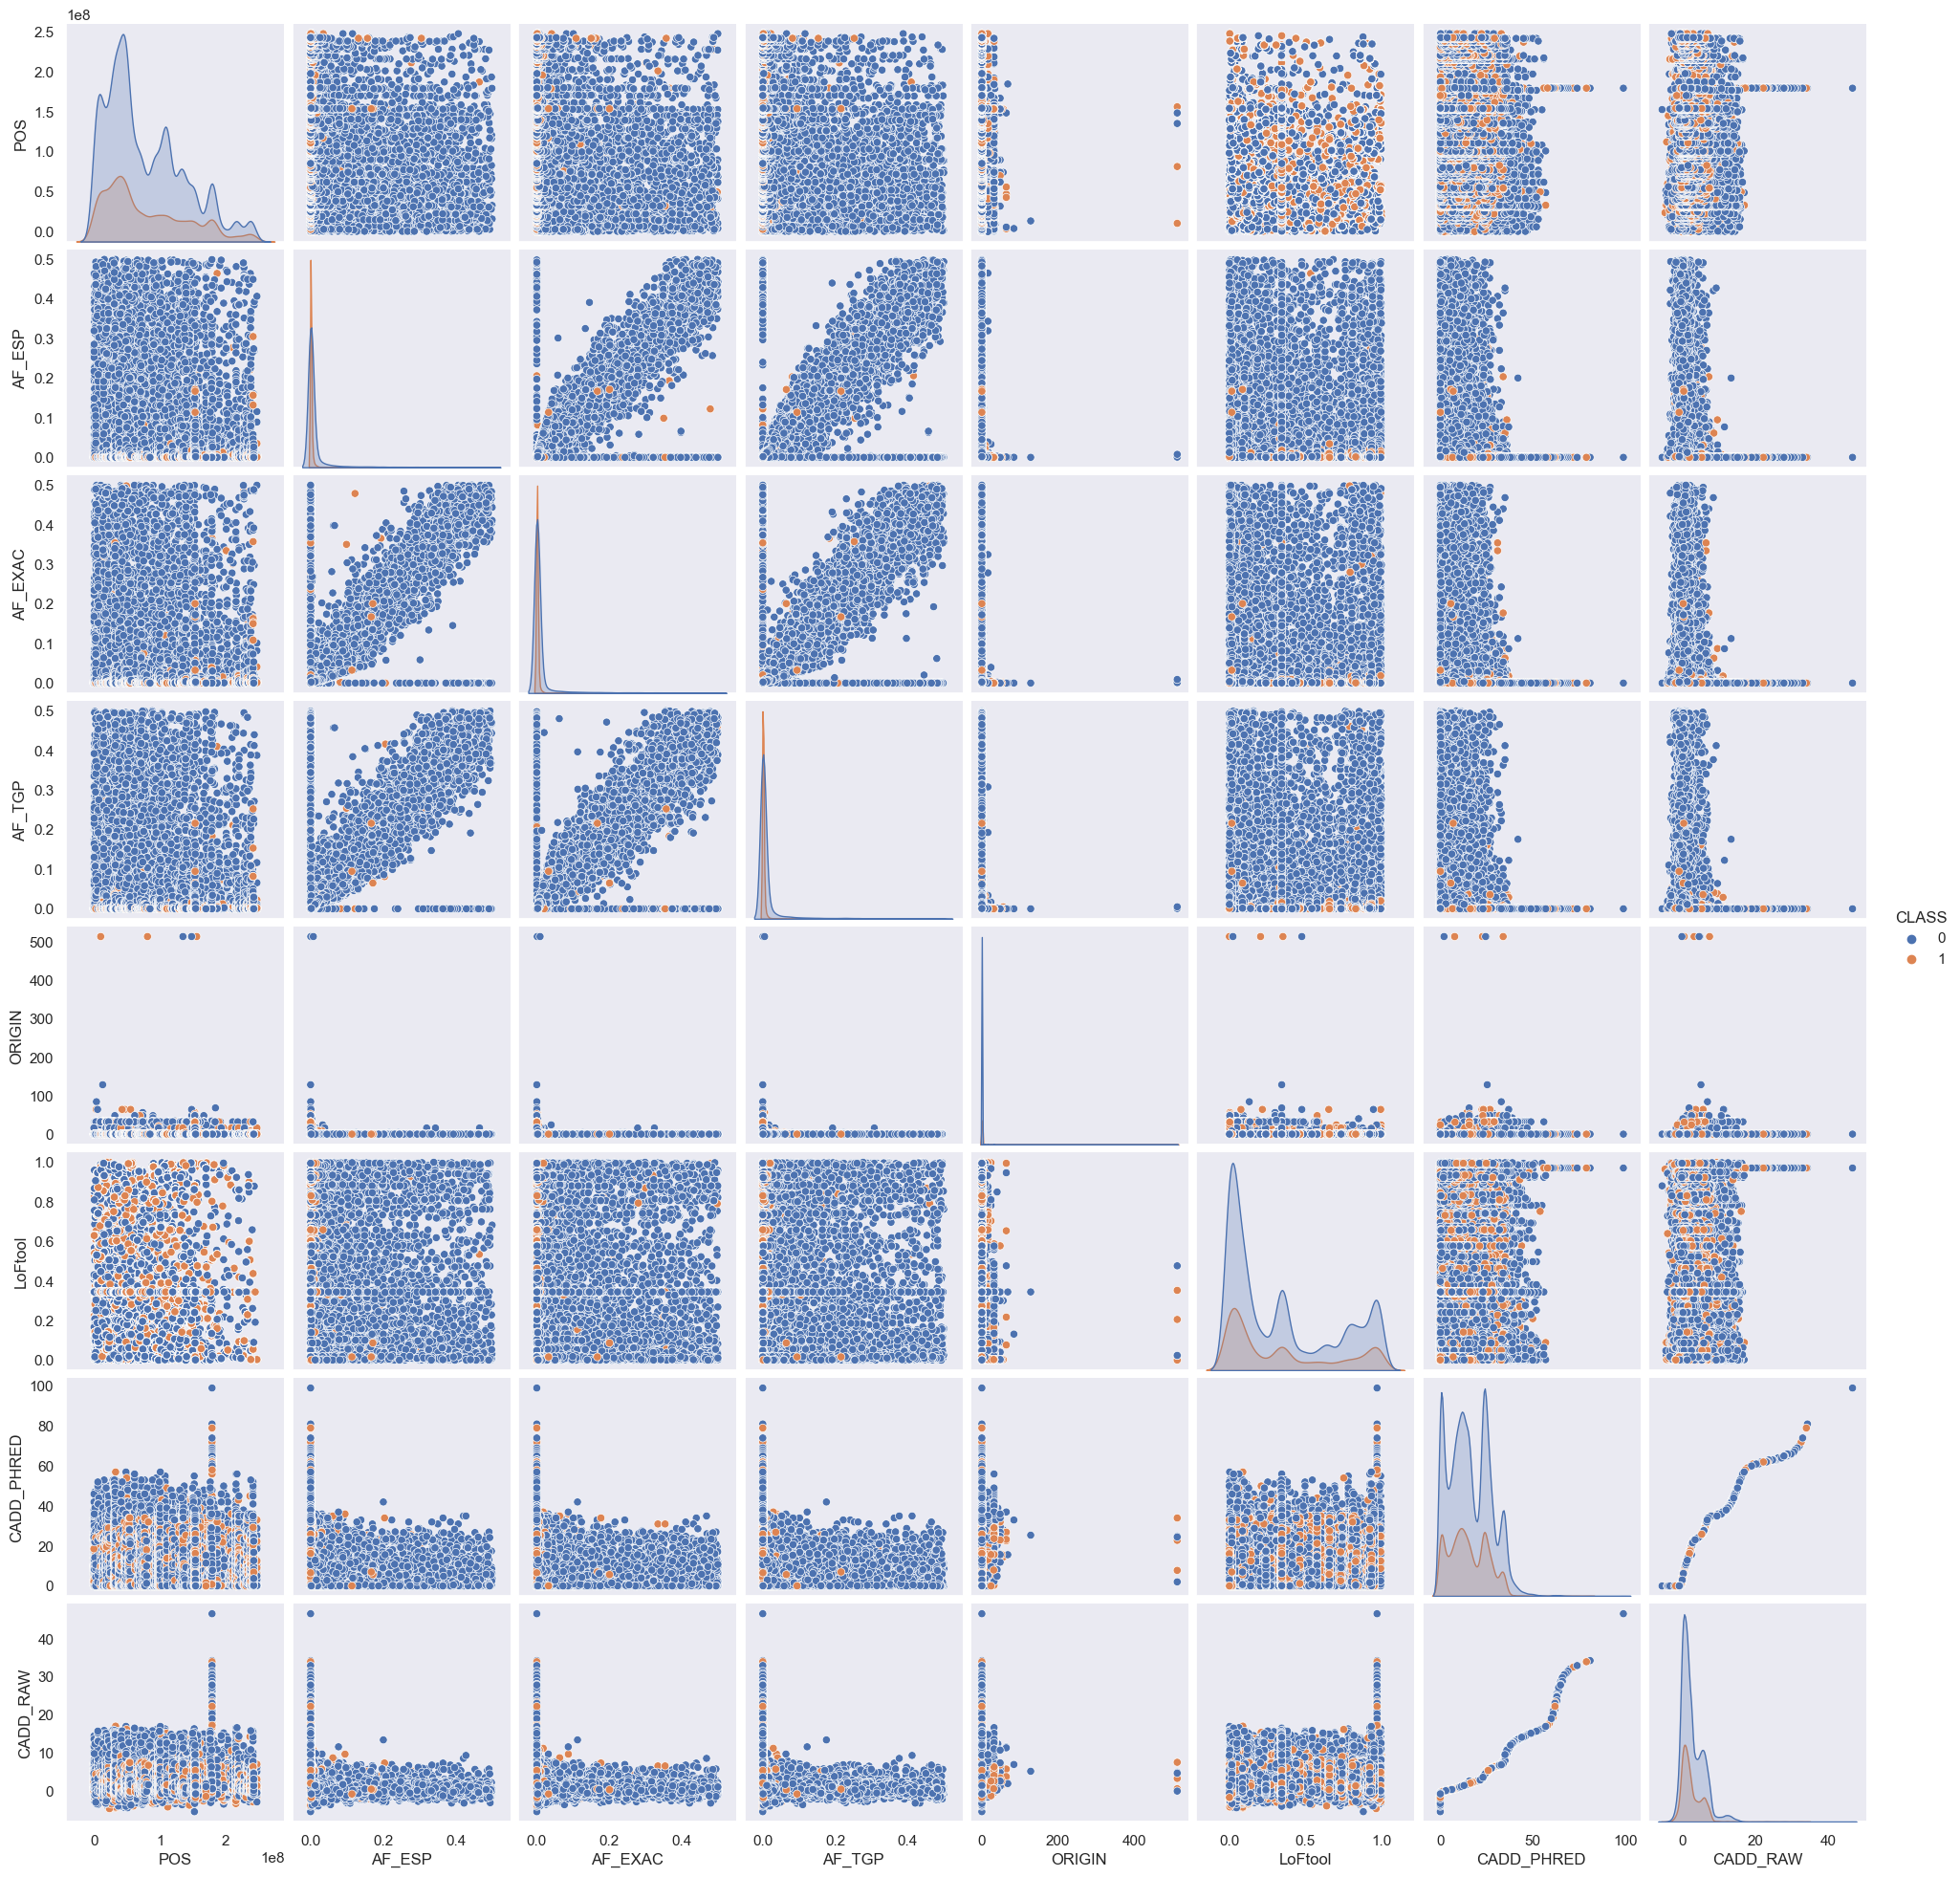

In [27]:
sns.pairplot (df2, hue ="CLASS")
plt.show ()


# distribution

Minimum:961.00
Mean:77575938.96
Median:57970213.00
Mode:89876827.00
Maximum:247607973.00



C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2362663922.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


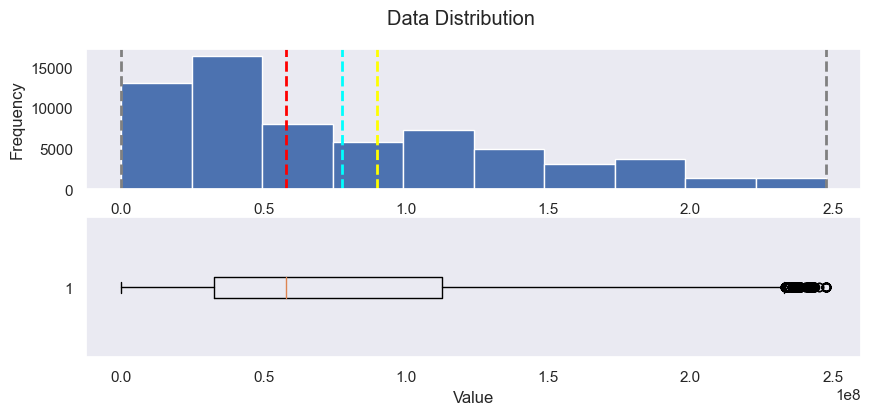

In [28]:
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram   
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot   
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Data Distribution')

    # Show the figure
    fig.show()


show_distribution(df2['POS'])

Minimum:0.00
Mean:0.01
Median:0.00
Mode:0.00
Maximum:0.50



C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2362663922.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


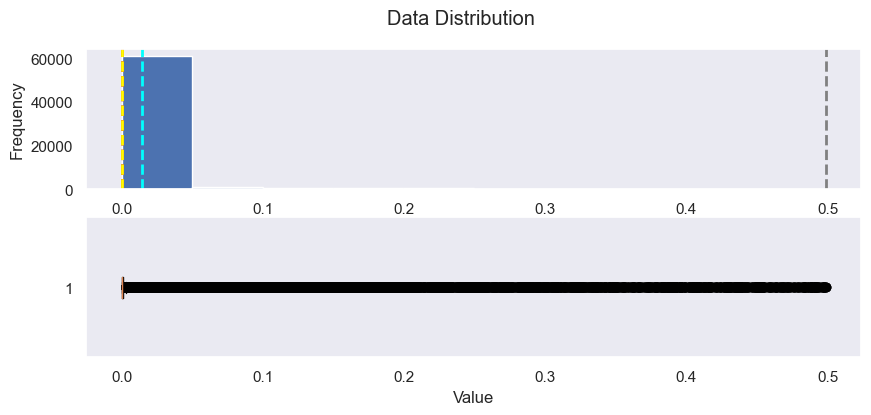

In [29]:
show_distribution(df2['AF_ESP'])

Minimum:961.00
Mean:77575938.96
Median:57970213.00
Mode:89876827.00
Maximum:247607973.00

POS None
Minimum:0.00
Mean:0.01
Median:0.00
Mode:0.00
Maximum:0.50

AF_ESP None
Minimum:0.00
Mean:0.01
Median:0.00
Mode:0.00
Maximum:0.50

AF_EXAC None
Minimum:0.00
Mean:0.02
Median:0.00
Mode:0.00
Maximum:0.50



C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2362663922.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2362663922.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2362663922.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2362663922.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2362663922.py:41: UserWarning: Matplotlib is currently using m

AF_TGP None
Minimum:0.00
Mean:1.34
Median:1.00
Mode:1.00
Maximum:513.00

ORIGIN None
Minimum:0.00
Mean:0.35
Median:0.21
Mode:0.35
Maximum:1.00

LoFtool None
Minimum:0.00
Mean:15.69
Median:14.32
Mode:34.00
Maximum:99.00

CADD_PHRED None
Minimum:-5.48
Mean:2.55
Median:1.69
Mode:2.55
Maximum:46.56



C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2362663922.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2362663922.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2362663922.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


CADD_RAW None
Minimum:0.00
Mean:0.25
Median:0.00
Mode:0.00
Maximum:1.00



C:\Users\91704\AppData\Local\Temp\ipykernel_28552\2362663922.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


CLASS None


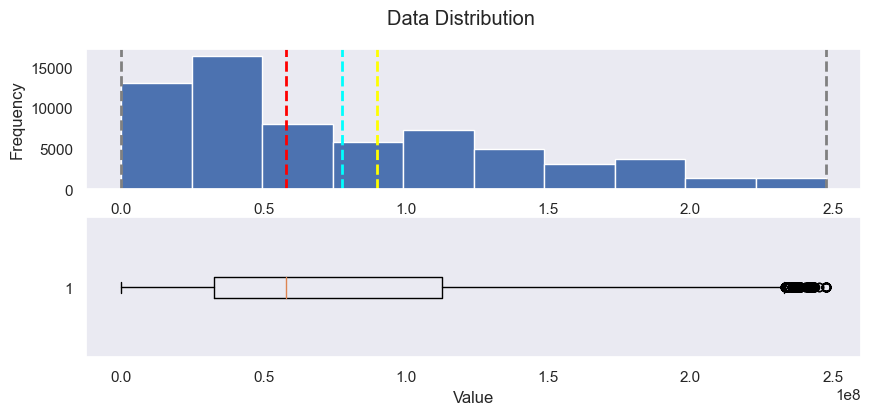

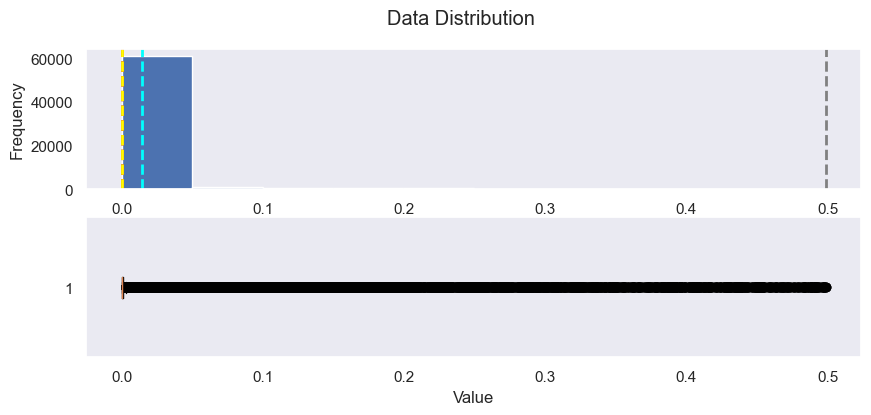

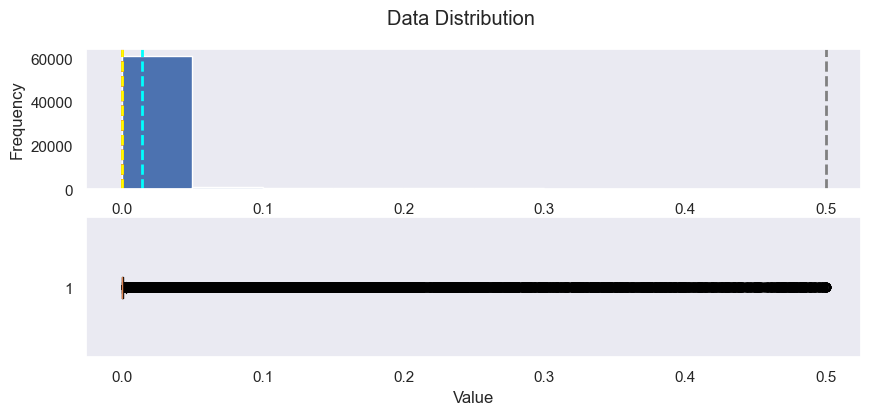

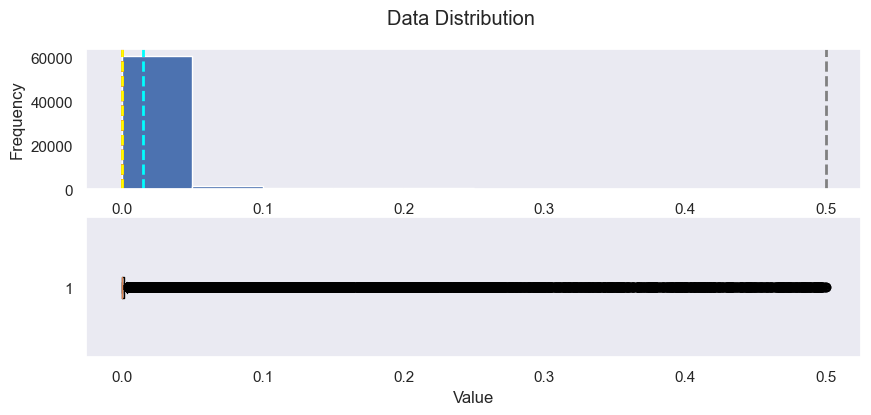

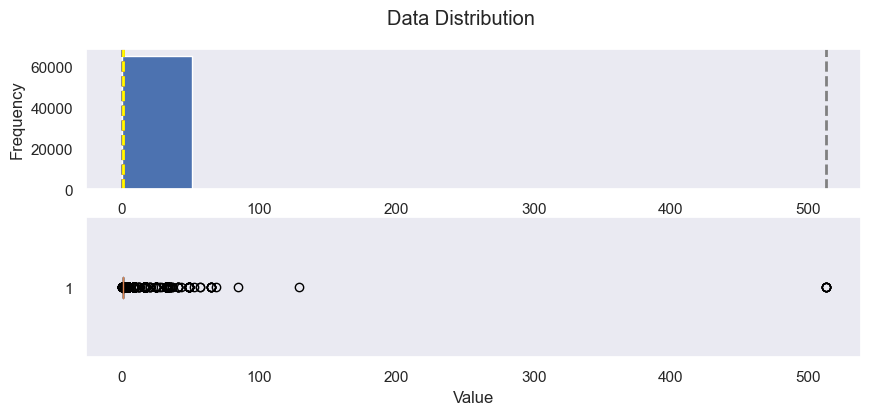

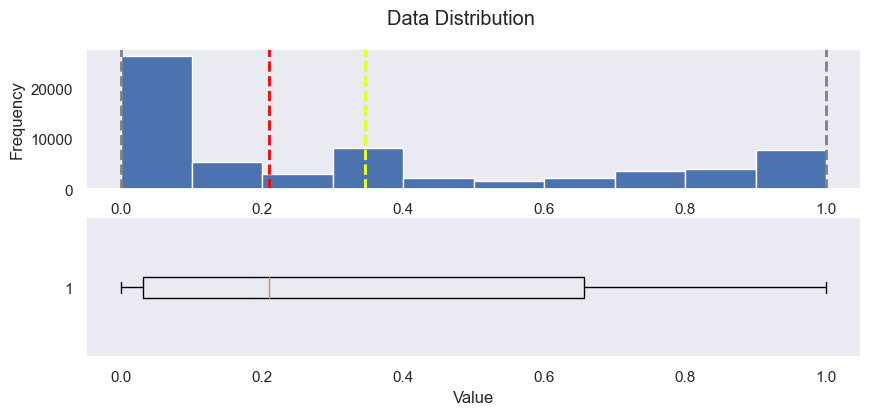

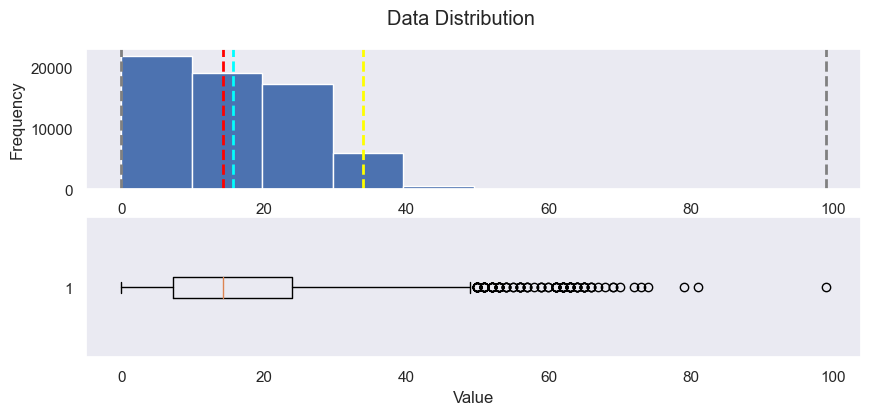

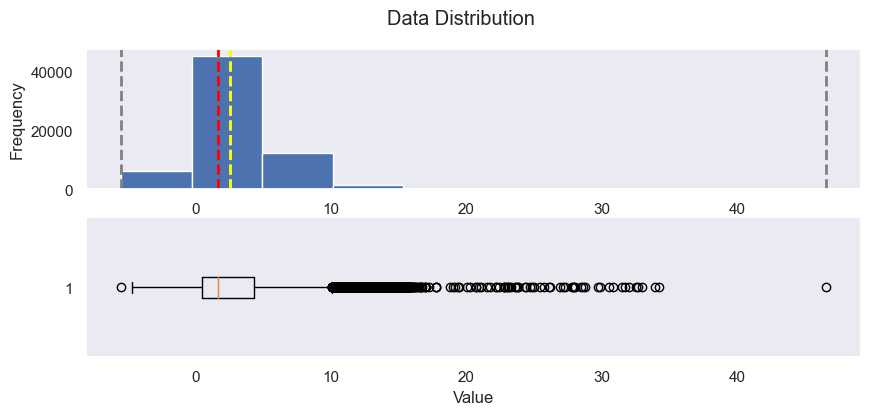

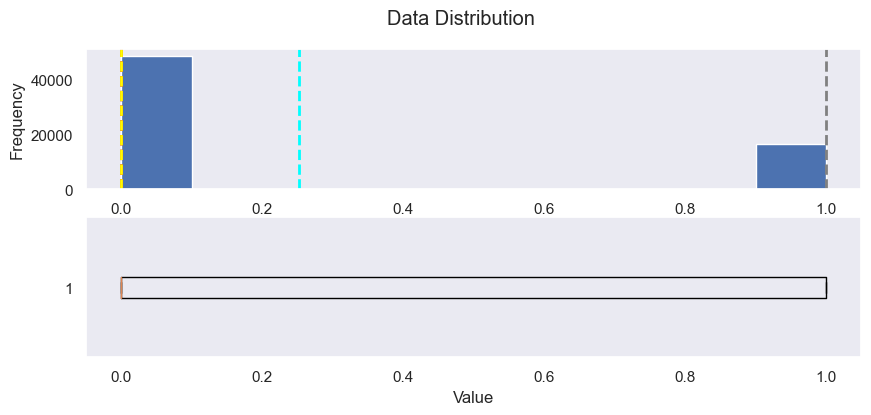

In [30]:
for i in df2:
    a=show_distribution(df2[i])
    b=i
    print(i,a)


# Density Plot

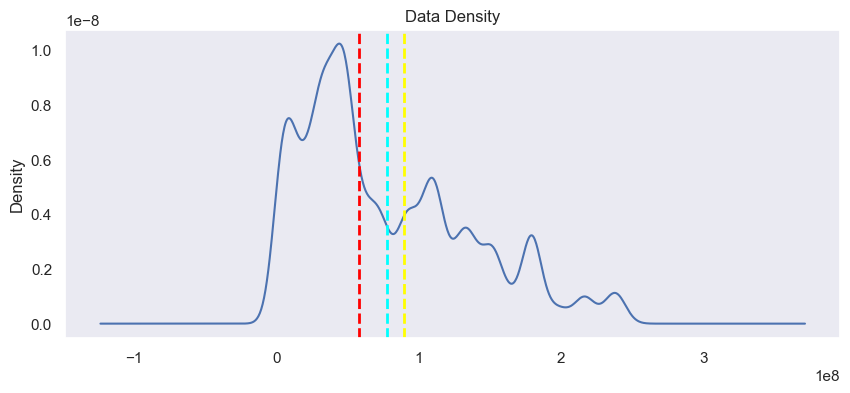

In [31]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title('Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

# Get the density of StudyHours
show_density(df2['POS'])

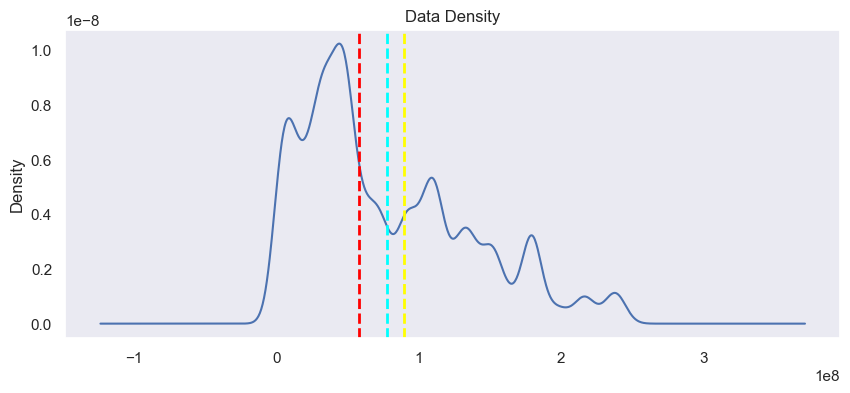

POS None


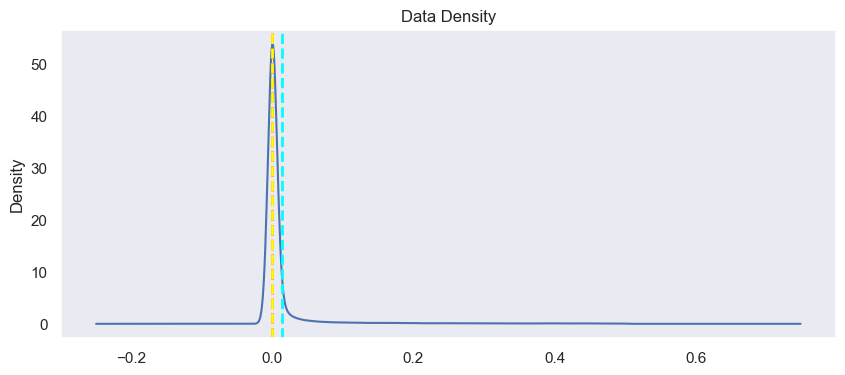

AF_ESP None


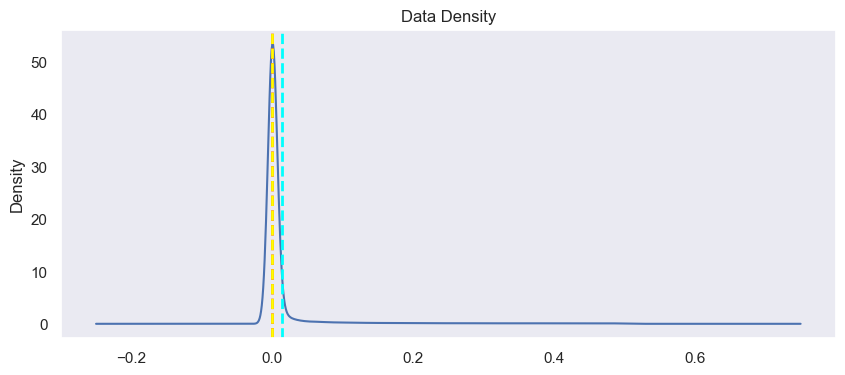

AF_EXAC None


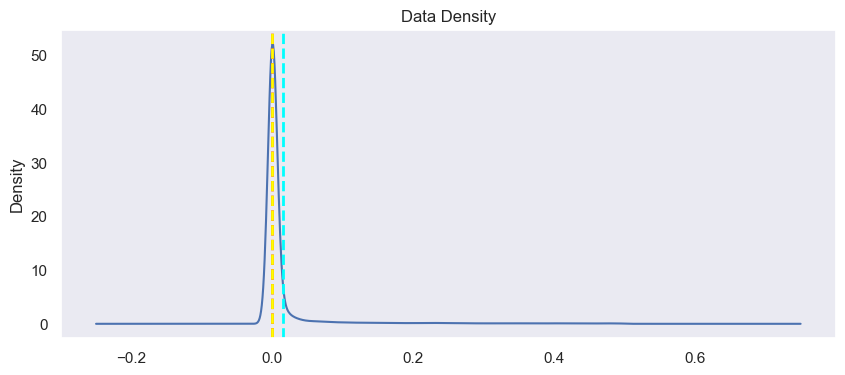

AF_TGP None


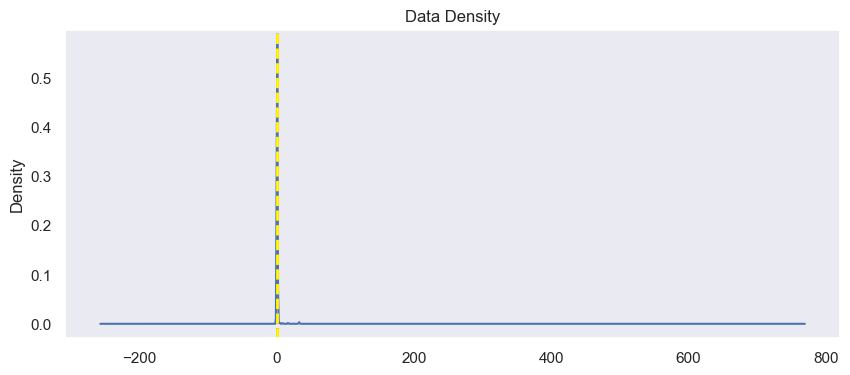

ORIGIN None


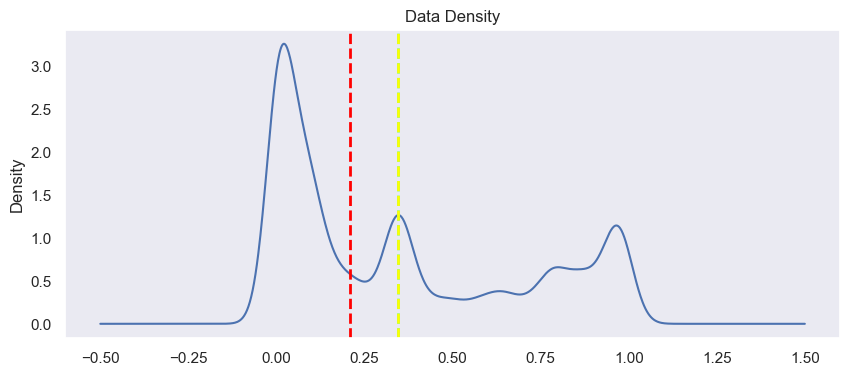

LoFtool None


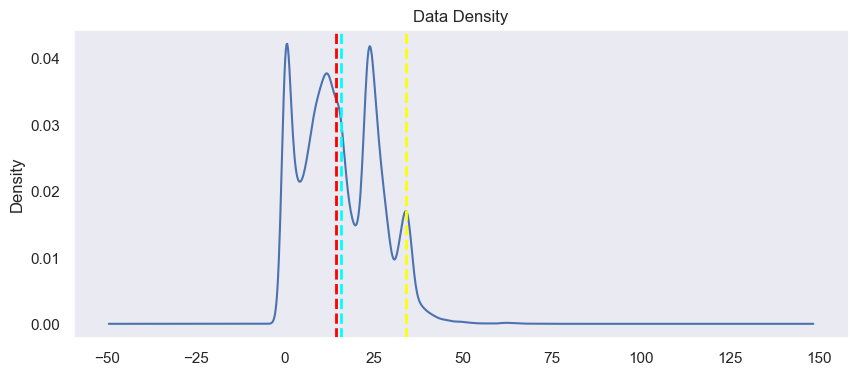

CADD_PHRED None


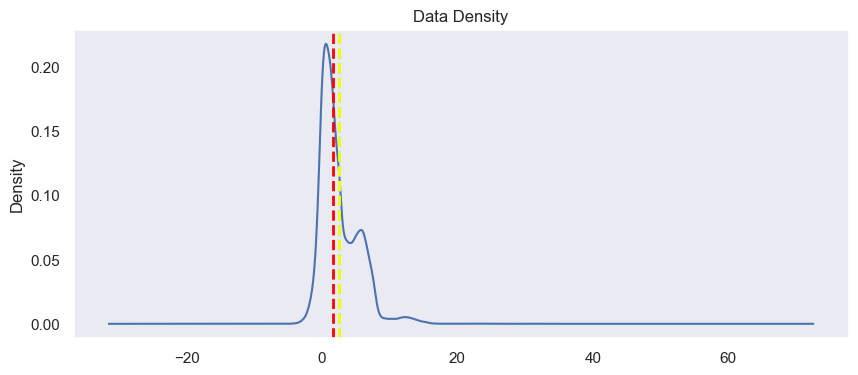

CADD_RAW None


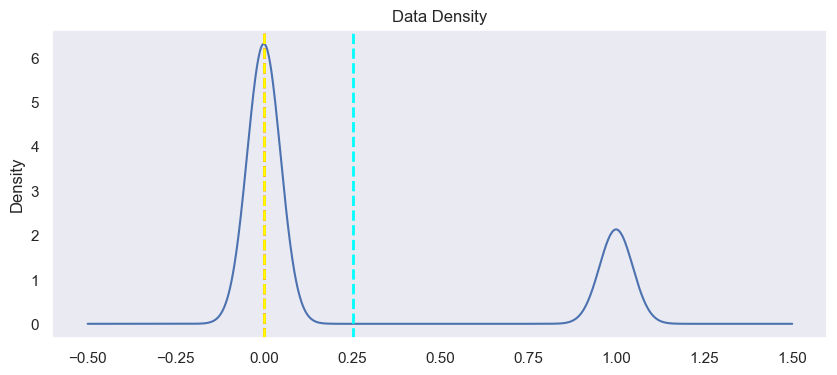

CLASS None


In [32]:
for i in df2:
    a=show_density(df2[i])
    b=i
    print(i,a)


In [33]:
for i in df2:
    col = df2[i]
    rng = col.max() - col.min()
    var = col.var() 
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(i, rng, var, std))


POS:
 - Range: 247607012.00
 - Variance: 3568928520823917.00
 - Std.Dev: 59740509.88

AF_ESP:
 - Range: 0.50
 - Variance: 0.00
 - Std.Dev: 0.06

AF_EXAC:
 - Range: 0.50
 - Variance: 0.00
 - Std.Dev: 0.06

AF_TGP:
 - Range: 0.50
 - Variance: 0.00
 - Std.Dev: 0.06

ORIGIN:
 - Range: 513.00
 - Variance: 32.36
 - Std.Dev: 5.69

LoFtool:
 - Range: 1.00
 - Variance: 0.12
 - Std.Dev: 0.35

CADD_PHRED:
 - Range: 99.00
 - Variance: 115.46
 - Std.Dev: 10.75

CADD_RAW:
 - Range: 52.03
 - Variance: 8.62
 - Std.Dev: 2.94

CLASS:
 - Range: 1.00
 - Variance: 0.19
 - Std.Dev: 0.43


In [34]:
df2.head()

POS  AF_ESP  AF_EXAC  AF_TGP  ORIGIN   LoFtool  CADD_PHRED  CADD_RAW  \
0  1168180  0.0771  0.10020  0.1066       1  0.345058       1.053 -0.208682   
1  1470752  0.0000  0.00000  0.0000       1  0.345058      31.000  6.517838   
2  1737942  0.0000  0.00001  0.0000      35  0.345058      28.100  6.061752   
3  2160305  0.0000  0.00000  0.0000      33  0.345058      22.500  3.114491   
4  2160305  0.0000  0.00000  0.0000      33  0.345058      24.700  4.766224   

   CLASS  
0      0  
1      0  
2      1  
3      0  
4      0

In [35]:

X = df2.drop(['CLASS'], axis=1)
y =df2.CLASS

In [36]:
print(X)
print(y)

             POS  AF_ESP  AF_EXAC  AF_TGP  ORIGIN   LoFtool  CADD_PHRED  \
0        1168180  0.0771  0.10020  0.1066       1  0.345058       1.053   
1        1470752  0.0000  0.00000  0.0000       1  0.345058      31.000   
2        1737942  0.0000  0.00001  0.0000      35  0.345058      28.100   
3        2160305  0.0000  0.00000  0.0000      33  0.345058      22.500   
4        2160305  0.0000  0.00000  0.0000      33  0.345058      24.700   
...          ...     ...      ...     ...     ...       ...         ...   
65183  154158201  0.0801  0.13923  0.1605       1  0.001580       0.105   
65184  154159118  0.0020  0.00060  0.0013       1  0.001580       0.002   
65185  154194886  0.0125  0.00370  0.0111       1  0.001580      12.850   
65186  154490187  0.0003  0.00034  0.0000       1  0.345058       0.130   
65187  154508542  0.0019  0.00267  0.0008       1  0.140000       0.046   

       CADD_RAW  
0     -0.208682  
1      6.517838  
2      6.061752  
3      3.114491  
4      4.

# Split Data

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# feature Scaling

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


# Fitting logistic regression to the training set 


In [40]:
clf = LogisticRegression()
clf.fit(X_train, y_train)


y_pred = clf.predict(X_test)
print("Accuracy score :",accuracy_score(y_test,y_pred))


Accuracy score : 0.7502684460806872


In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [42]:
confusion_matrix(y_test,y_pred)

array([[14672,     0],
       [ 4884,     1]], dtype=int64)

In [43]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.75      1.00      0.86     14672
           1       1.00      0.00      0.00      4885

    accuracy                           0.75     19557
   macro avg       0.88      0.50      0.43     19557
weighted avg       0.81      0.75      0.64     19557



In [44]:
X = df2.drop(['CLASS'], axis=1)
y =df2.CLASS

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()


In [47]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
rf.score(X_train,y_train)

0.9998246805899498

In [49]:
y_pred =rf.predict(X_test)

In [50]:
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresold=roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
roc_auc

0.60350110892959

In [51]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [52]:
print("Accuracy score :",accuracy_score(y_test,y_pred))

Accuracy score : 0.7543079204376949


In [53]:
confusion_matrix(y_test,y_pred)

array([[13276,  1396],
       [ 3409,  1476]], dtype=int64)

In [54]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85     14672
           1       0.51      0.30      0.38      4885

    accuracy                           0.75     19557
   macro avg       0.65      0.60      0.61     19557
weighted avg       0.73      0.75      0.73     19557



In [55]:
X = df2.drop(['CLASS'], axis=1)
y =df2.CLASS

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [58]:
from sklearn.neighbors import KNeighborsClassifier
cls =KNeighborsClassifier(n_neighbors=5)
cls.fit(X_train,y_train)

KNeighborsClassifier()

In [59]:
y_pred = cls.predict(X_test)

In [60]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix


In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82     14672
           1       0.39      0.25      0.30      4885

    accuracy                           0.72     19557
   macro avg       0.58      0.56      0.56     19557
weighted avg       0.68      0.72      0.69     19557



In [62]:
print(confusion_matrix(y_test,y_pred))

[[12783  1889]
 [ 3675  1210]]
